# Model

## Imports

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load Data

In [21]:
# check the current working directory
current_working_directory = os.getcwd()
print(current_working_directory)

/Users/albertolandi/Documents/GitHub/ML2_Practice/ML2_Project/modelo_normal


In [22]:
PATH = '/Users/albertolandi/Documents/GitHub/ML2_Practice/ML2_Project'

# load data
data = pd.read_csv(f'{PATH}/dataset/AEP_hourly_preprocessed-v2.csv')

# Display the first few rows of the dataframe
data.head()

,Datetime,AEP_MW,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Weekend,Quarter,Hour,Date,last_7_mean,last_14_mean,LastDay
0,2004-10-01 02:00:00,11935.0,2004,10,1,40,4,275,0,4,2,2004-10-01,12157.000000,12157.000000,12379.0
1,2004-10-01 03:00:00,11692.0,2004,10,1,40,4,275,0,4,3,2004-10-01,12002.000000,12002.000000,11935.0
2,2004-10-01 04:00:00,11597.0,2004,10,1,40,4,275,0,4,4,2004-10-01,11900.750000,11900.750000,11692.0
3,2004-10-01 05:00:00,11681.0,2004,10,1,40,4,275,0,4,5,2004-10-01,11856.800000,11856.800000,11597.0
4,2004-10-01 06:00:00,12280.0,2004,10,1,40,4,275,0,4,6,2004-10-01,11927.333333,11927.333333,11681.0


In [23]:
# Display dataframe information
print("\nDataFrame Information:\n")
data.info()


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121272 entries, 0 to 121271
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Datetime      121272 non-null  object 
 1   AEP_MW        121272 non-null  float64
 2   Year          121272 non-null  int64  
 3   Month         121272 non-null  int64  
 4   Day           121272 non-null  int64  
 5   WeekOfYear    121272 non-null  int64  
 6   DayOfWeek     121272 non-null  int64  
 7   DayOfYear     121272 non-null  int64  
 8   Weekend       121272 non-null  int64  
 9   Quarter       121272 non-null  int64  
 10  Hour          121272 non-null  int64  
 11  Date          121272 non-null  object 
 12  last_7_mean   121272 non-null  float64
 13  last_14_mean  121272 non-null  float64
 14  LastDay       121272 non-null  float64
dtypes: float64(4), int64(9), object(2)
memory usage: 13.9+ MB


In [24]:
# Display summary statistics
print("\nSummary Statistics:\n")
data.describe()


Summary Statistics:



,AEP_MW,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Weekend,Quarter,Hour,last_7_mean,last_14_mean,LastDay
count,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000
mean,15499.539449,2011.170047,6.500280,15.723341,26.497609,2.999505,182.418242,0.285606,2.503018,11.501674,15499.436209,15499.274685,15499.519411
std,2591.394257,4.011141,3.461454,8.802181,15.130015,1.999823,105.840556,0.451704,1.122194,6.921793,2412.679281,2148.146567,2591.408991
min,9581.000000,2004.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9805.285714,10458.357143,9581.000000
25%,13630.000000,2008.000000,4.000000,8.000000,13.000000,1.000000,91.000000,0.000000,2.000000,6.000000,13735.250000,13906.142857,13630.000000
50%,15310.000000,2011.000000,6.000000,16.000000,26.000000,3.000000,181.000000,0.000000,2.000000,12.000000,15272.357143,15262.285714,15310.000000
75%,17200.000000,2015.000000,10.000000,23.000000,40.000000,5.000000,276.000000,1.000000,4.000000,18.000000,17079.285714,16898.089286,17200.000000
max,25695.000000,2018.000000,12.000000,31.000000,53.000000,6.000000,366.000000,1.000000,4.000000,23.000000,24859.285714,23810.642857,25695.000000


## Train-test split

In [25]:
# Determine the split points 
train_size = 0.7
val_size = 0.2
test_size = 0.2

# Calculate split indices
train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

# Split the data
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

# Separate features (X) and target (y)
X_train = train_data.drop(['Datetime', 'Date', 'AEP_MW'], axis=1)
y_train = train_data['AEP_MW']

X_val = val_data.drop(['Datetime', 'Date', 'AEP_MW'], axis=1)
y_val = val_data['AEP_MW']

X_test = test_data.drop(['Datetime', 'Date', 'AEP_MW'], axis=1)
y_test = test_data['AEP_MW']

In [26]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((84890, 12), (84890,), (24254, 12), (24254,), (12128, 12), (12128,))

## Scaling

In [27]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Store scaled data in dictionaries for easy access
scaled_data = {
    'StandardScaler': {
        'X_train': X_train_scaled,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled
    }
}

## Models

In [28]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Trains, evaluates, and prints results for a given model (using StandardScaler).

    Args:
        model: The scikit-learn model object.
        model_name: A string name for the model.
        X_train, y_train, X_val, y_val, X_test, y_test: Data splits.

    Returns:
        A dictionary containing the trained model and test set results.
    """

    # Always use StandardScaler
    X_train_used = X_train
    X_val_used = X_val
    X_test_used = X_test
    

    # Train the model
    print(f"Training {model_name}...")
    model.fit(X_train_used, y_train)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val_used)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    print(f"--- Validation Set Results ({model_name}) ---")
    print(f"RMSE: {rmse_val:.4f}")
    print(f"MAE: {mae_val:.4f}")
    print(f"R2: {r2_val:.4f}")

    # Evaluate on the test set
    y_test_pred = model.predict(X_test_used)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"--- Test Set Results ({model_name}) ---")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    print(f"R2: {r2_test:.4f}")

    # Store results and model
    results = {
        'model': model,
        'val_rmse': rmse_val,
        'val_mae': mae_val,
        'val_r2': r2_val,
        'test_rmse': rmse_test,
        'test_mae': mae_test,
        'test_r2': r2_test
    }

    return results

In [29]:
# Initialize models
model_lr = LinearRegression()  # For comparison with BayesianLinearRegression
model_rf = RandomForestRegressor(random_state=42)  # For comparison with HoeffdingTreeRegressor
model_knn = KNeighborsRegressor()  # For comparison with KNNRegressor

# Store all results
all_results = {}

In [30]:
# --- Linear Regression ---
all_results['Linear Regression'] = train_and_evaluate_model(
    model_lr, 'Linear Regression', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)



Training Linear Regression...
--- Validation Set Results (Linear Regression) ---
RMSE: 401.9309
MAE: 303.7442
R2: 0.9743
--- Test Set Results (Linear Regression) ---
RMSE: 370.6906
MAE: 280.6261
R2: 0.9773


In [31]:
# --- Random Forest ---
all_results['Random Forest'] = train_and_evaluate_model(
    model_rf, 'Random Forest', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training Random Forest...
--- Validation Set Results (Random Forest) ---
RMSE: 186.7233
MAE: 133.6353
R2: 0.9945
--- Test Set Results (Random Forest) ---
RMSE: 180.2312
MAE: 133.1317
R2: 0.9946


In [33]:
# --- KNN ---
all_results['KNN'] = train_and_evaluate_model(
    model_knn, 'KNN', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training KNN...
--- Validation Set Results (KNN) ---
RMSE: 573.0724
MAE: 443.8225
R2: 0.9477
--- Test Set Results (KNN) ---
RMSE: 621.1680
MAE: 471.3052
R2: 0.9362


## Evaluation

In [34]:
# --- Compare Results ---
# Create a DataFrame for easier comparison
results_df = pd.DataFrame.from_dict(all_results, orient='index')
print("\n--- Comparison of All Models ---")
display(results_df[['val_rmse', 'test_rmse', 'val_mae', 'test_mae', 'val_r2', 'test_r2']])


--- Comparison of All Models ---


,val_rmse,test_rmse,val_mae,test_mae,val_r2,test_r2
Linear Regression,401.930936,370.690608,303.744205,280.626122,0.974285,0.977264
Random Forest,186.723320,180.231206,133.635275,133.131735,0.994450,0.994625
KNN,573.072387,621.167981,443.822471,471.305178,0.947724,0.936159


In [35]:
# Find the best model based on validation RMSE
best_model_name = results_df['val_rmse'].idxmin()
best_model = all_results[best_model_name]['model']
print(f"\nBest model based on validation RMSE: {best_model_name}")


Best model based on validation RMSE: Random Forest


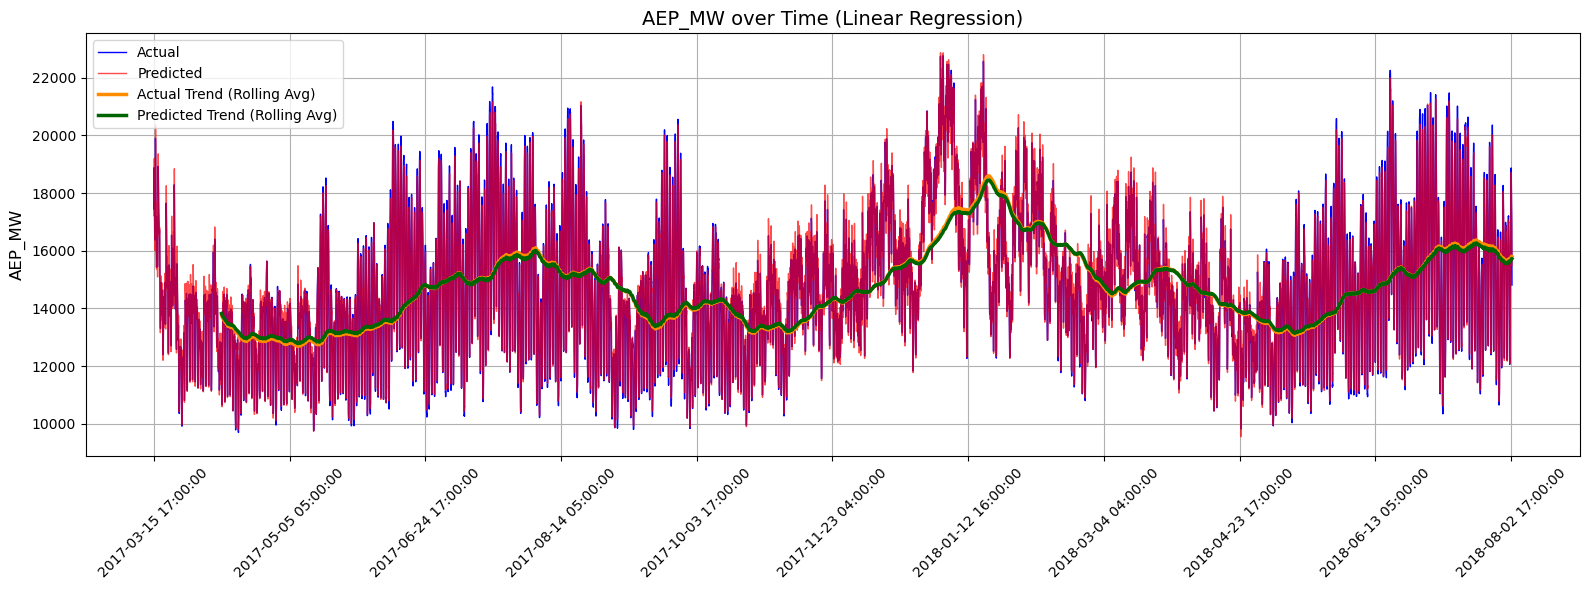

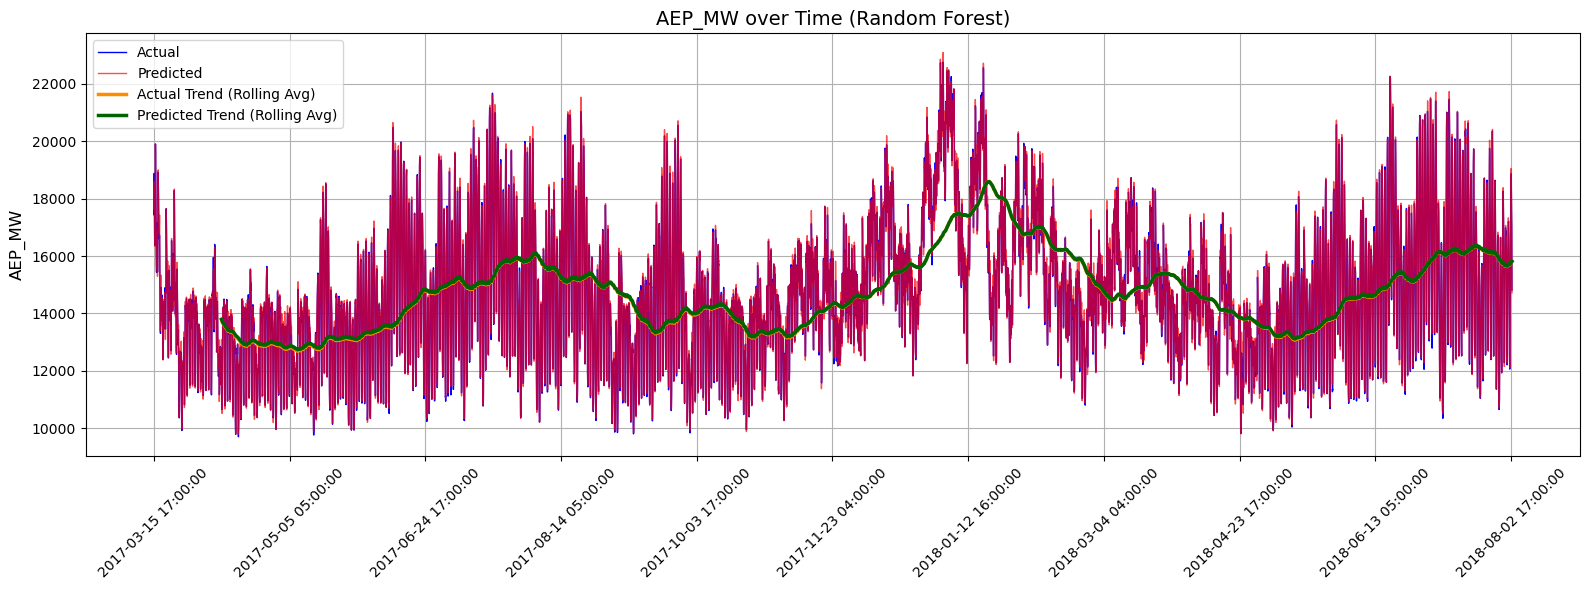

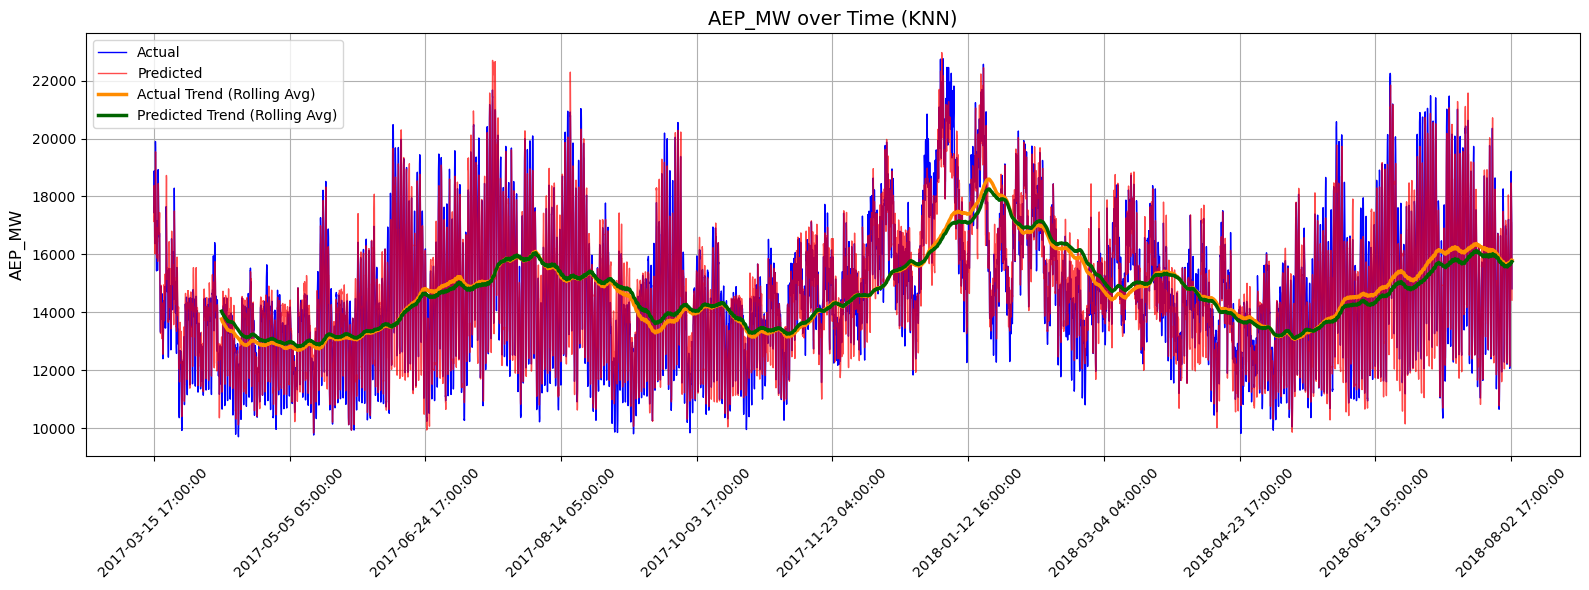

In [36]:
def plot_time_series_predictions(model, X_test, y_test, title, start_date=None, end_date=None):
    """
    Plots the actual and predicted values over time, with distinct trendlines.

    Args:
        model: The trained scikit-learn model.
        X_test: Test set features.
        y_test: Test set target values (AEP_MW).
        title: A string title for the plot.
        start_date: (Optional) Start date for plotting (datetime object or string).
        end_date: (Optional) End date for plotting (datetime object or string).
    """

    y_pred = model.predict(X_test)

    # Create a DataFrame
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
    results_df = results_df.merge(data[['Datetime']], left_index=True, right_index=True)

    # Date filtering
    if start_date is not None:
        results_df = results_df[results_df['Datetime'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        results_df = results_df[results_df['Datetime'] <= pd.to_datetime(end_date)]

    plt.figure(figsize=(16, 6))

    # Calculate trendlines
    window_size = int(len(results_df) * 0.05)
    window_size = max(window_size, 2)
    actual_trendline = results_df['Actual'].rolling(window=window_size).mean()
    predicted_trendline = results_df['Predicted'].rolling(window=window_size).mean()

    # Plot Actual and Predicted (keep these as they are)
    plt.plot(results_df['Datetime'], results_df['Actual'], label='Actual', color='blue', alpha=1, linewidth=1)
    plt.plot(results_df['Datetime'], results_df['Predicted'], label='Predicted', color='red', alpha=0.7, linewidth=1)

    # Plot trendlines with solid lines, thicker, and contrasting colors
    plt.plot(results_df['Datetime'], actual_trendline, color='darkorange', linestyle='-', linewidth=2.5, label='Actual Trend (Rolling Avg)')
    plt.plot(results_df['Datetime'], predicted_trendline, color='darkgreen', linestyle='-', linewidth=2.5, label='Predicted Trend (Rolling Avg)')


    # Plot every few ticks
    tick_interval = len(results_df) // 10
    plt.xticks(results_df['Datetime'][::tick_interval], rotation=45)
    plt.ylabel('AEP_MW', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Choose a subset of models to plot (excluding SVR)
models_to_plot = {
    name: result['model'] for name, result in all_results.items()
}

# Plot time series for selected models
for name, model in models_to_plot.items():
        #Always use standard scaler
        X_test_used = scaled_data['StandardScaler']['X_test']
        plot_time_series_predictions(model, X_test_used, y_test, title=f'AEP_MW over Time ({name})')